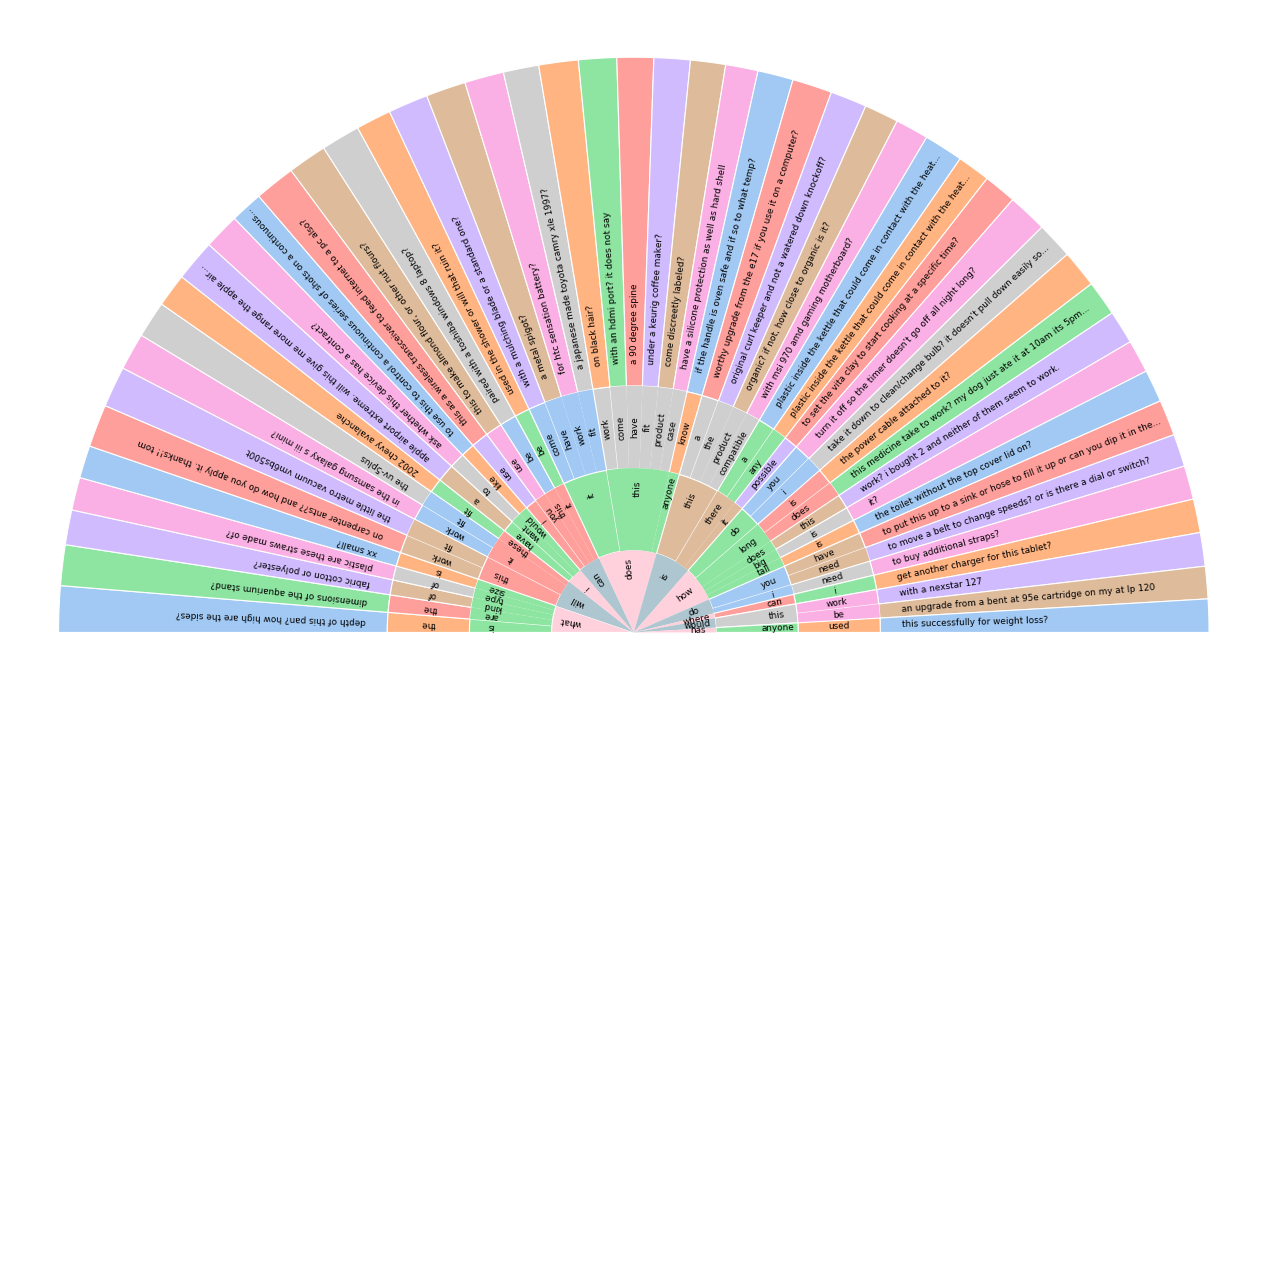

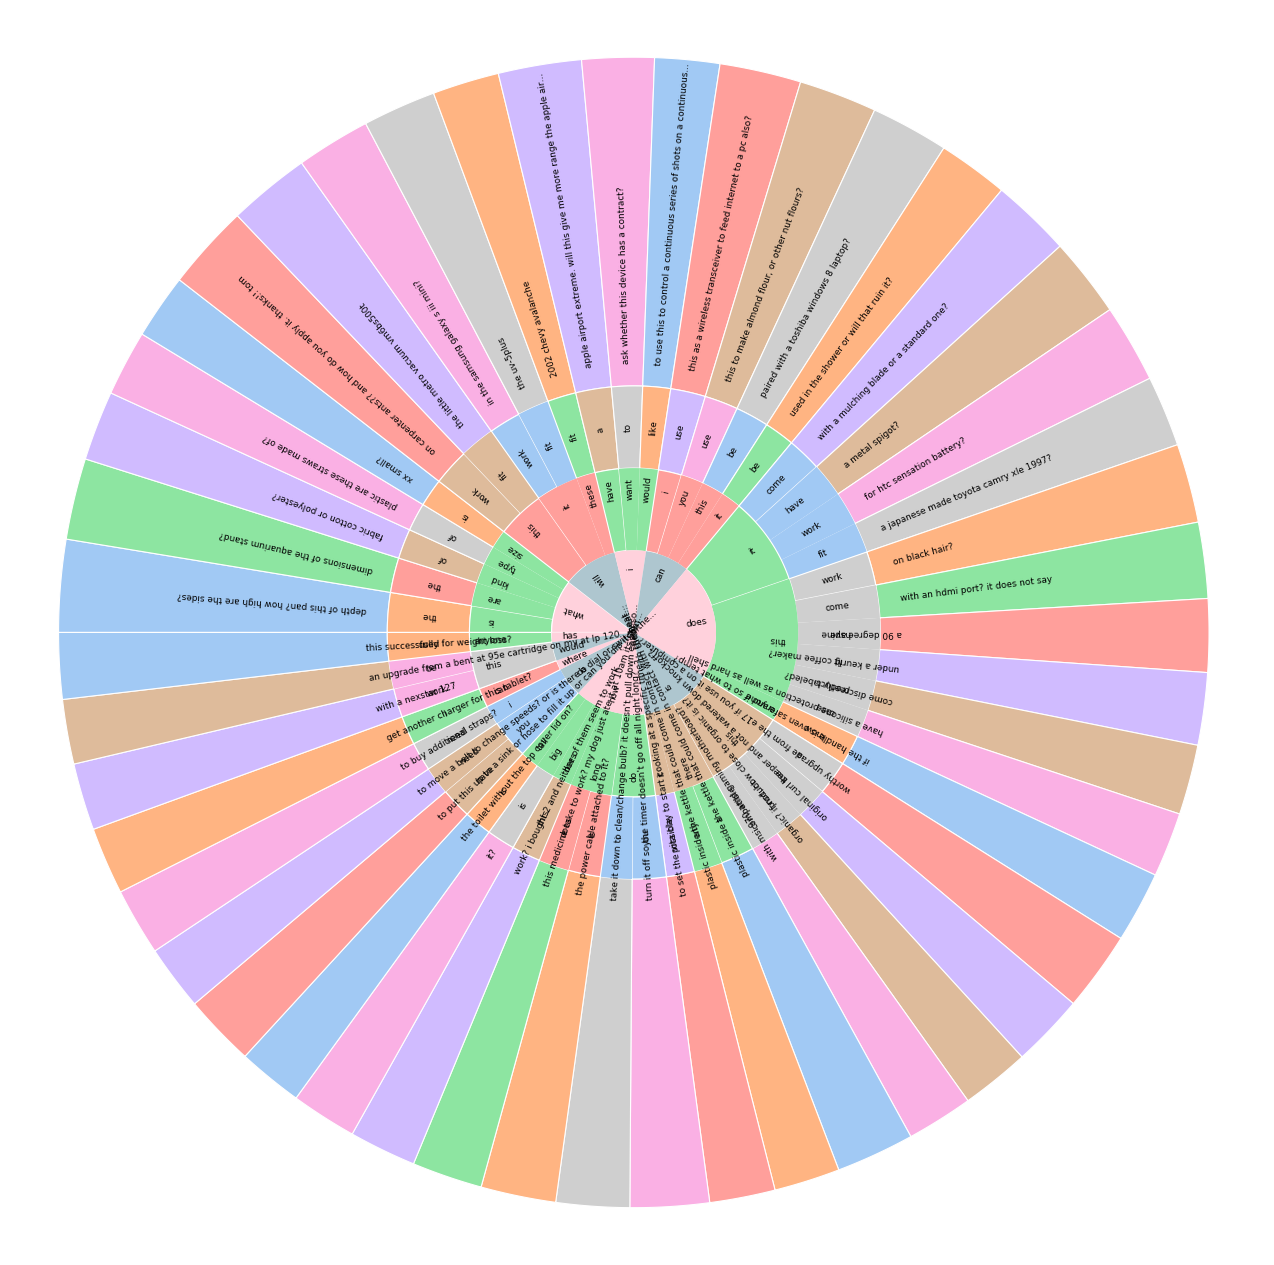

In [187]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def sunburst(nodes, total=np.pi * 2, offset=0, level=0, ax=None, total_heights=None):
    #total /= 2.0
    #print(nodes[0][0], total)
    colors = []
    for i in range(len(nodes)):
        if i % 2 == 0:
            colors.append('#ffd1dc')
        else:
            colors.append('#aec6cf')
            
    ax = ax or plt.subplot(111, projection='polar')
    
    if level == 0 and len(nodes) == 1:
        label, value, subnodes = nodes[0]
        ax.bar([0], [0.5], [np.pi * 2], color='white')
        ax.text(0, 0, label, ha='center', va='center')
        total_heights = [0.0] * len(nodes)
        sunburst(subnodes, total=value, level=level + 1, ax=ax, total_heights=total_heights)
    elif nodes:
        d = np.pi * 2/ total
        labels = []
        widths = []
        local_offset = offset
        for label, value, subnodes in nodes:
            #print(value, label)
            labels.append(label)
            widths.append(value * d)
            total_heights += [0.25] * len(nodes)
            sunburst(subnodes, total=total, offset=local_offset,
                     level=level + 1, ax=ax, total_heights=total_heights)
            local_offset += value
        values = np.cumsum([offset * d] + widths[:-1])
        heights = [0.25] * len(nodes)
        bottoms = np.zeros(len(nodes)) + level*0.25 - 0.5
        if level == 4:
            heights = [1] * len(nodes) 
            #bottoms = np.zeros(len(nodes)) + level - 0.5
            
        if level==1:
            rects = ax.bar(values, heights, widths, bottoms, linewidth=1, edgecolor='white', align='edge', color=colors)
        else:
            rects = ax.bar(values, heights, widths, bottoms, linewidth=1, edgecolor='white', align='edge')
        for total_height, rect, label in zip(total_heights, rects, labels):
            x = rect.get_x() + rect.get_width() / 2
            if level == 1:
                y = rect.get_y() + rect.get_height() /  2 + rect.get_height() / 3.6
            elif level == 2:
                y = rect.get_y() + rect.get_height() /  2 + rect.get_height() / 4
            elif level == 3:
                y = rect.get_y() + rect.get_height() /  2
            else:
                y = rect.get_y() + rect.get_height() / 15#/ 1.5
                
            rotation = (90 + 90 + (360 - np.degrees(x) % 180)) % 360
            #rotation=90
            if level == 4:
                label = ' '.join(label.split()[3:][0:])
                ax.text(x, y, label, rotation=rotation, ha='left', va='center', fontsize=8, wrap=True) 
            else:
                ax.text(x, y, label, rotation=rotation, ha='center', va='center', fontsize=8, wrap=True) 

    if level == 0:
        ax.set_theta_direction(-1)
        ax.set_theta_zero_location('W')
        ax.set_axis_off()

lst = [('', 100, lst1)]

sns.set_palette(sns.color_palette("pastel", 8))

plt.figure(num=None, figsize=(20, 20), dpi=80)

sunburst(lst)

plt.show()
#plt.savefig('donut.pdf')



In [173]:
#store = [('what is the', 21183), ('will this work', 9814), ('i have a', 7814), ('will this fit', 6837), ('can i use', 6472), ('what are the', 6328), ('does it come', 5449), ('does it have', 5313), ('is this a', 5290), ('how do you', 4980), ('does this work', 4945), ('is there a', 4634), ('does it work', 4632), ('can you use', 4501), ('can this be', 4411), ('does this come', 3584), ('how long is', 3263), ('will it work', 2963), ('will it fit', 2709), ('how do i', 2701), ('does this have', 2649), ('is this the', 2612), ('does this fit', 2433), ('i want to', 2376), ('do you have', 2285), ('does anyone know', 2128), ('does it fit', 2093), ('how long does', 1991), ('can it be', 1987), ('does this product', 1904), ('what kind of', 1834), ('is this product', 1618), ('do i need', 1422), ('where can i', 1406), ('how does this', 1395), ('would this work', 1382), ('will these fit', 1324), ('is this compatible', 1288), ('has anyone used', 1258), ('is there any', 1211), ('how big is', 1193), ('what type of', 1186), ('i have an', 1173), ('is it possible', 1168), ('do you need', 1124), ('how tall is', 1104), ('what size is', 1100), ('i would like', 1083), ('does this case', 1074), ('would this be', 1061), ('how is the', 1048), ('does this unit', 1038), ('is it a', 987), ('does this phone', 983), ('is this for', 946), ('will these work', 941), ('where is this', 936), ('i need to', 917), ('i am looking', 896), ('how does it', 890), ('how well does', 855), ('is it compatible', 850), ('how can i', 844), ('will this case', 836), ('how much does', 810), ('what color is', 791), ('how does the', 785), ('has anyone tried', 784), ('how wide is', 768), ('i need a', 757), ('i have the', 755), ('can these be', 734), ('where is the', 698), ('is there an', 694), ('can you put', 673), ('does this item', 644), ('is this an', 626), ('how is this', 620), ('can anyone tell', 618), ('how long are', 614), ('would this fit', 614), ('will this product', 614), ('is this good', 583), ('does this camera', 571), ('how much weight', 558), ('has anyone had', 557), ('do you think', 556), ('i bought this', 555), ('is it good', 548), ('how long do', 545), ('do i have', 543), ('is this phone', 523), ('can you tell', 515), ('what size are', 514), ('is it easy', 511), ("i'm looking for", 507), ('does this include', 502), ('does this model', 500), ('i just bought', 478), ('do these work', 474), ('can i put', 471), ('are there any', 449), ('will this hold', 443), ('do you know', 442), ('how big are', 440), ('how thick is', 436), ('does anyone have', 435), ('can i connect', 430), ('can this product', 424), ('can i get', 423), ('is this item', 406), ('how long will', 393), ('is this case', 391), ('how easy is', 391), ('will this phone', 391), ('is this made', 389), ('will they fit', 386), ('are these the', 386), ("what's the difference", 381), ('can i buy', 376), ('do these have', 366), ('do these fit', 365), ('if i buy', 362), ('what do you', 361), ('will this battery', 359), ('will it hold', 345), ('i just got', 339), ('i just received', 337), ('does it include', 332), ('does this kit', 332), ('where do i', 331), ('are you able', 329), ('can you get', 328), ('is it made', 325), ('what does the', 324), ('the description says', 320), ('i am a', 318), ('how high is', 317), ('will this lens', 317), ('can i plug', 314), ('do these come', 313), ('could this be', 312), ('what material is', 311), ('where do you', 310), ('will this unit', 309), ('could i use', 308), ('how deep is', 307), ('how loud is', 305), ('how heavy is', 304), ('can you buy', 297), ('i live in', 296), ('can you play', 296), ('can someone tell', 295), ('would it be', 295), ('does this device', 291), ('how many inches', 290), ('does this battery', 287), ('can this phone', 286), ('will i be', 286), ('is it safe', 286), ('can you turn', 280), ('is this just', 277), ('does this set', 277), ('will this be', 276), ('do you get', 274), ('what does it', 274), ('is this one', 272), ('can this unit', 272), ('will this charge', 269), ("i'd like to", 269), ('can you make', 265), ('why does the', 261), ('i purchased this', 261), ('how often do', 259), ('what is this', 259), ('is this unit', 257), ('we have a', 256), ('what is a', 253), ('do they come', 252), ('if i have', 251), ('would i be', 250), ('does this charger', 248), ('does the case', 248), ('can i hook', 248), ('is this battery', 248), ('how is it', 247), ('how large is', 247), ('how tall are', 246), ('i have this', 245), ('do they have', 244), ('is it really', 242), ('why is this', 241), ('will this cover', 241), ('can you take', 240), ('can you plug', 240), ('how good is', 240), ('does it really', 240), ('would you recommend', 239), ('why does it', 238), ('can you remove', 237), ('can you please', 236), ('would it work', 236), ('is this really', 234), ('anyone know if', 233), ('does this cover', 230), ('can this work', 230), ('how many ounces', 229), ('will this cable', 226), ('can you set', 224), ('i have two', 224), ('is the back', 223), ('will this charger', 221), ('can you connect', 220), ('can they be', 220), ('will this mount', 220), ('does this one', 219), ('how do these', 218), ('does this printer', 217), ('can you charge', 216), ('can you add', 215), ('does it make', 214), ('i just purchased', 213), ('does it need', 210), ('does this machine', 209), ('do they fit', 208), ('does this laptop', 208), ('can i install', 206), ('size', 206), ('is this safe', 205), ('does this lens', 205), ('can you adjust', 204), ('how long can', 203), ('where are these', 203), ('does it support', 201), ('can you fit', 200), ('is the bottom', 199), ('is this price', 199), ('can someone please', 199), ('how many watts', 198), ('i was wondering', 197), ('is it for', 197), ('will this item', 196), ('can i charge', 195), ('why is the', 195), ('is this lens', 193), ('i see that', 193), ('can i just', 191), ('do they work', 190), ('how hard is', 190), ('would these work', 189), ('does it play', 187), ('will this holster', 187), ('will this remote', 187), ('will this device', 186), ('where are the', 186), ('what do i', 185), ('my son is', 185), ('would it fit', 183), ('can i play', 183), ('will they work', 182), ('does it take', 181), ('do you use', 180), ('does the lid', 178), ('is the top', 178), ('i am trying', 177), ('is it worth', 176), ('does this also', 176), ('are these good', 176), ('i have 2', 175), ('is it dishwasher', 175), ('does it charge', 175), ('does this keyboard', 175), ('is the color', 174), ('what color are', 174), ('does this tv', 174), ('does this game', 174), ('how can you', 173), ('has anyone else', 172), ('does this support', 172), ('will this adapter', 172), ('does this monitor', 171), ('can this fit', 170), ('i bought a', 170), ('i wear a', 169), ('is this set', 169), ('the picture shows', 169), ('does this need', 169), ('can you hook', 169), ('does it help', 167), ('does this bag', 167), ('this is a', 167), ('i bought the', 166), ('can you attach', 165), ('can i add', 165), ('does it use', 164), ('if i use', 163), ('does this cable', 163), ('does the camera', 162), ('is the battery', 161), ('does this computer', 160), ('does it hold', 160), ('does it comes', 159), ('how difficult is', 159), ("i don't see", 159), ('does it works', 159), ('how well do', 159), ('can you change', 158), ('can you mount', 157), ('does the unit', 157), ('is it the', 157), ('what does this', 157), ('has anyone found', 157), ('how would you', 156), ('how are the', 156), ('i just want', 156), ('is this model', 155), ('does the phone', 155), ('is this camera', 155), ('does it contain', 155), ('how do the', 155), ("i can't get", 155), ('if i order', 153), ('do you sell', 153), ('one of the', 153), ('i know this', 152), ('is the handle', 152), ('is the inside', 152), ('is it ok', 152), ('is this knife', 152), ('will it charge', 152), ('can it fit', 152), ('how far does', 151), ('can i mount', 151), ("i don't have", 150), ('where can you', 150), ('can this device', 150), ('will this card', 148), ('why does this', 147), ('does this filter', 147), ('will this kit', 147), ('does this chair', 147), ("i'm trying to", 146), ('does this remote', 146), ('i do not', 145), ('is this bag', 145), ('does this light', 144), ('does this require', 143), ('will this also', 143), ('how large are', 143), ('will this replace', 143), ('can it hold', 142), ('how to use', 142), ('how fast does', 142), ('would these be', 142), ('i have one', 142), ('are these made', 142), ('does this fan', 142), ('does anyone use', 141), ('does this use', 141), ('how sturdy is', 140), ('could you use', 139), ('looking for a', 139), ('is this only', 139), ('what would be', 139), ('can i purchase', 138), ('hi, i have', 138), ('does this help', 137), ('i have had', 137), ('i have been', 136), ('is the lid', 136), ('i want a', 136), ('i ordered this', 136), ('is the case', 135), ('how are these', 135), ('how wide are', 135), ('i need the', 134), ('it looks like', 133), ('how would this', 132), ('what size of', 132), ('does anybody know', 132), ('does this contain', 132), ('does this tablet', 131), ('how to install', 131), ('would this product', 131), ('will this bag', 131), ('does this card', 131), ('which is the', 130), ('i am having', 130), ('can you leave', 130), ('could you please', 130), ('how many hours', 130), ('does this adapter', 130), ('is this easy', 130), ('are these compatible', 130), ('is the price', 129), ('can you see', 129), ('can i make', 128), ('is it true', 126), ('is the keyboard', 126), ('can i run', 125), ('how durable is', 125), ('is this suitable', 125), ('does it require', 125), ('i plan to', 124), ('i am thinking', 124), ('is it just', 124), ('what age is', 124), ('how much space', 124), ('how much do', 123), ('how much water', 122), ('does the keyboard', 122), ('can you install', 121), ('why is it', 121), ("i'm looking to", 121), ('my daughter is', 121), ('what size should', 121), ('can it work', 121), ('i am interested', 121), ('is this too', 120), ('does this system', 120), ('will i need', 120), ('is this device', 119), ('how big of', 119), ('i already have', 119), ('where does the', 119), ('can this camera', 118), ('is the screen', 118), ('does this really', 118), ('can you record', 118), ('can i attach', 117), ('i just ordered', 117), ('will this filter', 116), ('can i order', 116), ('can you cook', 115), ('i see the', 115), ('how many pieces', 115), ('does the light', 115), ('are all the', 115), ('can we use', 115), ('is it hard', 114), ('what is included', 113), ('is the blade', 113), ('will this stand', 113), ('can you still', 113), ('i have read', 112), ('do any of', 112), ('does the handle', 112), ('does anyone else', 112), ('is the seat', 112), ('about how many', 112), ('hi, does this', 111), ('does the top', 111), ('how much of', 110), ('are the shelves', 110), ('how many cups', 110), ('is this compatable', 109), ('i am wondering', 109), ('how many times', 109), ('will this rack', 109), ('will it be', 109), ('does the battery', 109), ('can you download', 109), ('i lost the', 109), ('is the product', 108), ('does the product', 108), ('is it normal', 108), ('has anyone ever', 107), ('what about the', 107), ('if you have', 107), ('how deep are', 107), ('are these for', 107), ('how does one', 107), ('can i fit', 107), ('are the wheels', 107), ('would these fit', 106), ('hi, is this', 106), ('does this make', 106), ('i wanted to', 106), ('how much is', 106), ('is this light', 106), ('can this item', 106), ('can this fan', 106), ('can you replace', 105), ('is the cover', 104), ('i got this', 104), ('is the base', 104), ("what's the best", 104), ('i know it', 103), ('about how long', 103), ('is this better', 103), ('i am not', 103), ('does it get', 103), ('it says it', 103), ('is this game', 102), ('do the wheels', 102), ('if i want', 102), ('is there enough', 102), ('how thick are', 101), ('if i purchase', 101), ('how long should', 101), ('is this keyboard', 101), ('how far apart', 101), ('does this mouse', 101), ('when is the', 101), ('what size would', 101), ('are the keys', 101), ('whats the difference', 101), ('what comes with', 100), ('i lost my', 100), ('does this mount', 100), ('anyone use this', 100), ('how many of', 100), ('does this radio', 100), ('is it waterproof?', 100), ('is this dishwasher', 99), ('can i replace', 99), ('how many batteries', 99), ('can you run', 99), ('is the height', 99), ('does it has', 98), ('can you purchase', 98), ('will this help', 98), ('how many pounds', 98), ('can u use', 98), ('can you do', 97), ('is this cable', 97), ('can you cut', 97), ('does this headset', 97), ('does it fold', 95), ('would like to', 95), ('i currently have', 95), ('what is in', 95), ('does the remote', 95), ('does the charger', 95), ('can you just', 94), ('is this printer', 94), ('is it suitable', 94), ('i am considering', 94), ('does this charge', 94), ('what material are', 93), ('this is the', 93), ('how do they', 93), ('the product description', 93), ('is the cord', 93), ('what comes in', 93), ('should i get', 92), ('can you wear', 92), ('does this player', 92), ('is this chair', 92), ('can i set', 92), ('please tell me', 92), ('can i take', 92), ('does this scope', 92), ('what is it', 92), ('how many servings', 91), ('is it necessary', 91), ('is this ok', 91), ('is the plastic', 91), ('i own a', 91), ('is this pan', 91), ('how many pages', 91), ('could you tell', 90), ('is there anything', 90), ('what size batteries', 90), ('will this allow', 90), ('can anyone confirm', 89), ('anyone know how', 89), ('does this heater', 89), ('how high does', 88), ('i can not', 88), ('can you give', 88), ('how many gallons', 88), ('will this camera', 88), ('what size for', 88), ('where is it', 88), ('do these headphones', 87), ('is it water', 87), ('how long did', 87), ('what age group', 87), ('does it also', 87), ('does this knife', 87), ('will it play', 86), ('does it do', 86), ('how to get', 86), ('how hot does', 86), ('are they good', 86), ('i have to', 86), ('hi, will this', 86), ('can you print', 86), ('i cannot get', 86), ('how many calories', 86), ('how many mg', 85), ('how many come', 85), ('how many amps', 85), ('there is a', 85), ('does it cover', 85), ('does this bike', 85), ('i read that', 85), ('does the back', 85), ('does this play', 85), ('is this table', 85), ('can this case', 85), ('does this scale', 84), ('is this fan', 84), ('can i have', 84), ('is it an', 83), ('i am going', 83), ('if i were', 83), ('is this actually', 83), ('how often should', 83), ('is this machine', 83), ('does this hold', 82), ('can you wash', 82), ('does this seat', 82), ('is the light', 82), ('is it too', 82), ('does any one', 82), ('i am using', 82), ('can anyone recommend', 82), ('does this table', 82), ('can i record', 82), ('so is this', 81), ('will this keyboard', 81), ('how do u', 81), ('my dog is', 81), ('can you have', 80), ('is this card', 80), ('what is its', 80), ('does this only', 80), ('is it big', 80), ('i like to', 80), ('can you hang', 80), ("i can't find", 80), ('should i buy', 80), ('are these glasses', 80), ('can this light', 80), ('will this connect', 80), ('is it real', 80), ('i have very', 79), ('does it only', 79), ('do these speakers', 79), ('hello, i have', 79), ('how strong is', 79), ('how to clean', 79), ('so if i', 79), ('does it keep', 79), ('is the item', 79), ('this product is', 78), ('does this speaker', 78), ('i need this', 78), ('i bought one', 78), ('is the camera', 78), ('is this 100%', 78), ('what exactly is', 78), ('i will be', 77), ('does it matter', 77), ('is this sturdy', 77), ('i have seen', 77), ('need to know', 77), ('i wonder if', 77), ('how many cards', 77), ('i am planning', 77), ('is the interior', 76), ('if i am', 76), ('would this case', 76), ('will this power', 76), ('is the phone', 76), ('i see this', 76), ('i purchased the', 76), ('is there anyway', 76), ('will this support', 76), ('can you watch', 76), ('can i change', 76), ('do you put', 76), ('does this actually', 76), ('is it better', 76), ('does this lamp', 76), ('does it kill', 75), ('just want to', 75), ('is this big', 75), ('are any of', 75), ('how well would', 75), ('i was told', 75), ('i know the', 75), ('is it waterproof', 75), ("i don't understand", 75), ('will this screen', 74), ('are the lids', 74), ('why does my', 74), ('are these bags', 74), ('is it okay', 74), ('i want this', 74), ('what if i', 74), ('how far away', 74), ('how would i', 74), ('does this pump', 74), ('are the handles', 74), ('i need an', 73), ('does it actually', 73), ('is this real', 73), ('does it run', 73), ('will this tool', 73), ('will this play', 73), ('does the bottom', 73), ('i received my', 73), ("i'm new to", 73), ('how many lumens', 73), ('how many grams', 73), ('can you listen', 73), ('does the base', 72), ('how noisy is', 72), ('if you use', 72), ('this phone is', 72), ('if i wanted', 72), ('what size do', 72), ('will this printer', 72), ('for those who', 72), ('my husband is', 72), ('anyone know the', 72), ('i recently purchased', 72), ('does the bag', 71), ('can you program', 71), ('hi, i am', 71), ('how many people', 71), ('is this all', 71), ('which is better', 71), ('is it sturdy', 71), ('can i print', 71), ('am i able', 71), ('does it say', 71), ('does the screen', 71), ('how well will', 71), ('if this is', 71), ('does this allow', 71), ('has anyone been', 70), ('does this screen', 70), ('can it charge', 70), ('is this charger', 70), ('where was this', 70), ('if i put', 70), ('does the seat', 70), ('how many bags', 70), ('is the power', 70), ('how fast is', 70), ('can i download', 69), ('is this monitor', 69), ('what happens if', 69), ('how far can', 69), ('does the cover', 69), ('how to change', 69), ('do you still', 69), ('can this hold', 69), ('did anyone else', 69), ('will this scope', 69), ('some of the', 68), ('is this like', 68), ('will this bulb', 68), ('has anyone installed', 68), ('why is there', 68), ('hi i have', 68), ('can i leave', 68), ('who is the', 68), ('i have some', 68), ('is the glass', 68), ('does this watch', 68), ('are the batteries', 68), ('is it only', 68), ('is it difficult', 67), ('can it play', 67), ('i see a', 67), ('what can i', 67), ('i love this', 67), ('does it print', 67), ('i had a', 67), ('will this pump', 67), ('does this package', 67), ('is anyone using', 67), ('does this pan', 67), ('how many are', 66), ('can the battery', 66), ('are these bulbs', 66), ('does it remove', 66), ('does this tool', 66), ('are these headphones', 66), ('is there room', 66), ('can you hear', 66), ('this is for', 66), ('is this oil', 66), ('what country is', 66), ('there are two', 66), ('is the material', 66), ('i am new', 66), ('is this pump', 65), ("i don't know", 65), ('how long to', 65), ('does this take', 65), ('i have used', 65), ('has any one', 65), ('are these speakers', 65), ('in the picture', 65), ('so does this', 65), ('are these a', 64), ('would this hold', 64), ('i have just', 64), ('did anyone have', 64), ('how long would', 63), ('what are all', 63), ('i can use', 63), ('will this cord', 63), ('can you also', 63), ('do i get', 63), ('how bright is', 63), ('i am concerned', 63), ('does this pen', 63), ('can i remove', 63), ('is this also', 63), ('how quiet is', 63), ('do you recommend', 63), ('why do you', 63), ('i have no', 63), ('can i cut', 62), ('does this replace', 62), ('is this pillow', 62), ('would you be', 62), ('is this cover', 62), ('dose it come', 62), ('does the power', 62), ('does the package', 62), ("i'm thinking of", 62), ('it says that', 62), ('will this part', 62), ('there is no', 62), ('can this pan', 62), ('does this vacuum', 62), ('is the table', 62), ('what size battery', 61), ('can it use', 61), ('i use a', 61), ('what is difference', 61), ('is the charger', 61), ('can i used', 61), ('i am buying', 61), ('are they made', 61), ('does this plug', 61), ('does the kit', 61), ('how many feet', 61), ('does it record', 61), ('is this lamp', 60), ('will this seat', 60), ('are there two', 60), ('approximately how many', 60), ('can be used', 60), ('i plan on', 60), ('can i wear', 60), ('can you confirm', 60), ('will this cut', 60), ('how large of', 60), ('i understand that', 59), ('how do we', 59), ('is the cable', 59), ('i received this', 59), ('i know that', 59), ('does this version', 59), ('hi, i would', 59), ('can i still', 59), ('in what country', 59), ('i have never', 59), ('which one is', 59), ('is this considered', 59), ('does this drill', 58), ('can you control', 58), ('hello, does this', 58), ('does the fan', 58), ('do the legs', 58), ('will this model', 58), ('i purchased a', 58), ('is this what', 58), ('hi, what is', 58), ('i need something', 58), ('what happens when', 58), ('can i watch', 58), ('can this machine', 58), ('can i transfer', 58), ("i'm interested in", 58), ('does this thing', 58), ('how did you', 58), ('if i plug', 58), ('so this is', 58), ('does it turn', 58), ('do you really', 57), ('should i use', 57), ('how many in', 57), ('has anyone experienced', 57), ('how far from', 57), ('i am in', 57), ('is it one', 57), ('i am confused', 57), ('is it bpa', 57), ('is it quiet?', 57), ('does this bulb', 57), ('are they dishwasher', 57), ('is this bulb', 57), ("what's the size", 57), ('could someone please', 57), ('since this is', 57), ('just to be', 57), ('will this drive', 57), ('can you stack', 57), ('is this mouse', 57), ('does this stroller', 56), ('are there 2', 56), ('does this antenna', 56), ('would you say', 56), ('is this laptop', 56), ('is it compatable', 56), ('can anyone give', 56), ("i can't tell", 56), ('for those of', 56), ('does the front', 56), ('how many bottles', 56), ('does this mattress', 56), ('do these batteries', 56), ('can i keep', 56), ('is this screen', 56), ('does this mat', 56), ('does the box', 56), ('hi, can you', 56), ('what are dimensions', 56), ('does it clean', 55), ('it comes with', 55), ('can i listen', 55), ('does it smell', 55), ('im looking for', 55), ('anyone know what', 55), ('i have heard', 55), ('why do i', 55), ('does this box', 55), ('will these batteries', 55), ('dose it have', 55), ('can this pump', 55), ('can you store', 55), ('can this also', 55), ('does it show', 55), ('do the handles', 55), ('does this works', 55), ('will this light', 55), ('does this stand', 55), ('i got the', 55), ('is it full', 55), ('if i get', 55), ('are all of', 55), ('what makes this', 55), ('have any of', 54), ('does this receiver', 54), ('is the bottle', 54), ('can this battery', 54), ('i have bought', 54), ('i see it', 54), ('will this run', 54), ('i ordered the', 54), ('is this bike', 54), ('are the legs', 54), ('has anyone purchased', 54), ('i received the', 54), ('does this tent', 54), ('do these bags', 54), ('does the table', 54), ('where to get', 54), ('hi, can i', 54), ('will i get', 54), ('has anyone actually', 54), ('is this toy', 53), ('can you scan', 53), ('are the blades', 53), ('i was thinking', 53), ('is this gun', 53), ('does this gun', 53), ('any problems with', 53), ('has anyone noticed', 53), ('does it protect', 53), ('dishwasher safe?', 53), ('i got a', 53), ('how to set', 53), ('is this filter', 53), ('is this headset', 53), ('i have purchased', 53), ('i have 4', 53), ('can this printer', 53), ('when it is', 52), ('are you supposed', 52), ('are these really', 52), ('may i know', 52), ('this may be', 52), ('i just need', 52), ('can this bag', 52), ('does this part', 52), ('does this saw', 52), ('is that a', 52), ('does it stay', 52), ('i have 3', 52)]

bank = [('what is the', 21183),('will this work', 9814),('i have a', 7814),('will this fit', 6837),('can i use', 6472),('what are the', 6328),('does it come', 5449),('does it have', 5313),('is this a', 5290),('how do you', 4980),('does this work', 4945),('is there a', 4634),('does it work', 4632),('can you use', 4501),('can this be', 4411),('does this come', 3584),('how long is', 3263),('will it work', 2963),('will it fit', 2709),('how do i', 2701),('does this have', 2649),('is this the', 2612),('does this fit', 2433),('i want to', 2376),('do you have', 2285),('does anyone know', 2128),('does it fit', 2093),('how long does', 1991),('can it be', 1987),('does this product', 1904),('what kind of', 1834),('is this product', 1618),('do i need', 1422),('where can i', 1406),('how does this', 1395),('would this work', 1382),('will these fit', 1324),('is this compatible', 1288),('has anyone used', 1258),('is there any', 1211),('how big is', 1193),('what type of', 1186),('is it possible', 1168),('do you need', 1124),('how tall is', 1104),('what size is', 1100),('i would like', 1083),('does this case', 1074),('would this be', 1061)]

In [178]:
#lst = store
store = [(elem[0], np.log(elem[1])) for elem in bank]
S = sum([elem[1] for elem in store])*1. / 100.0
len(store), S

(49, 3.8377699453096192)

In [179]:
from collections import defaultdict
d1 = defaultdict(lambda: [0, defaultdict(lambda: [0, defaultdict(lambda: [0, defaultdict(lambda: [0, defaultdict()])] ) ] ) ] )

In [180]:
for st, freq in store:
    words = st.split()
    if len(words) != 3:
        continue
    word1 = words[0]
    word2 = words[1]
    word3 = words[2]
    word4 = qs_dict[' '.join(words)]
    #print(word1, word2, word3, word4)
    d1[word1][0] += freq / S
    d1[word1][1][word2][0] += freq / S
    d1[word1][1][word2][1][word3][0] += freq / S
    d1[word1][1][word2][1][word3][1][word4][0] += freq / S

In [181]:
import json
r = json.dumps(d1)
d = json.loads(r)


In [182]:
s = 0
for key in d:
    s += d[key][0]
    print(key, d[key][0])
print(s)

what 10.503327720844002
will 10.711526549672524
i 6.181802594002162
can 8.643960880258463
does 22.885993297009833
is 13.965053506390193
how 13.922910760443834
do 5.7373397201818825
where 1.8887281352623715
would 3.6996105408283215
has 1.8597462951064339
100.00000000000001


In [183]:
lst1 = []
for word1 in d:
    lst2 = []
    freq1 = d[word1][0]
    d2 = d[word1][1]
    for word2 in d2:
        lst3 = []
        freq2 = d2[word2][0]
        d3 = d2[word2][1]
        for word3 in d3:
            lst4 = []
            freq3 = d3[word3][0]
            d4 = d3[word3][1]
            for word4 in d4:
                freq4 = d4[word4][0]
                lst4.append((word4, freq4, []))
            lst3.append((word3, freq3, lst4))
        lst2.append((word2, freq2, lst3))
    lst1.append((word1, freq1, lst2))

In [184]:
lst1

[('what',
  10.503327720844002,
  [('is',
    2.5955058260744286,
    [('the',
      2.5955058260744286,
      [('what is the depth of this pan?  how high are the sides?',
        2.5955058260744286,
        [])])]),
   ('are',
    2.280683739301457,
    [('the',
      2.280683739301457,
      [('what are the dimensions of the aquarium stand?',
        2.280683739301457,
        [])])]),
   ('kind',
    1.9579742297997969,
    [('of',
      1.9579742297997969,
      [('what kind of fabric cotton or polyester?',
        1.9579742297997969,
        [])])]),
   ('type',
    1.8443892365691588,
    [('of',
      1.8443892365691588,
      [('what type of plastic are these straws made of?',
        1.8443892365691588,
        [])])]),
   ('size',
    1.8247746890991603,
    [('is',
      1.8247746890991603,
      [('what size is xx small?', 1.8247746890991603, [])])])]),
 ('will',
  10.711526549672524,
  [('this',
    4.69587020362934,
    [('work',
      2.395027671703834,
      [('will thi

In [142]:
165685.0 / 570132

0.29060813986936357

In [179]:
len(store)

50

In [181]:
plt.get_cmap('Pastel1')

In [279]:
lst

[('',
  100,
  [('what',
    19.091046262486042,
    [('is', 12.785104264115642, [('the', 12.785104264115642, [])]),
     ('are', 3.8192956513866676, [('the', 3.8192956513866676, [])]),
     ('kind', 1.1069197573709149, [('of', 1.1069197573709149, [])]),
     ('type', 0.715816157165706, [('of', 0.715816157165706, [])]),
     ('size', 0.6639104324471136, [('is', 0.6639104324471136, [])])]),
   ('what',
    19.091046262486042,
    [('is', 12.785104264115642, [('the', 12.785104264115642, [])]),
     ('are', 3.8192956513866676, [('the', 3.8192956513866676, [])]),
     ('kind', 1.1069197573709149, [('of', 1.1069197573709149, [])]),
     ('type', 0.715816157165706, [('of', 0.715816157165706, [])]),
     ('size', 0.6639104324471136, [('is', 0.6639104324471136, [])])]),
   ('what',
    19.091046262486042,
    [('is', 12.785104264115642, [('the', 12.785104264115642, [])]),
     ('are', 3.8192956513866676, [('the', 3.8192956513866676, [])]),
     ('kind', 1.1069197573709149, [('of', 1.1069197573

In [19]:
with open('sample_questions', 'rb') as f:
    lines = f.readlines()
lines = [str(line.strip().lower())[2:] for line in lines]

In [26]:
not_found = []
for i, tup in enumerate(bank):
    q = tup[0]
    found = False
    for line in lines:
        if line.startswith(q):
            print(line)
            found = True
    if not found:
        not_found.append(str(i) + ' ' + "NOT FOUND:"+ q)
    print()

what is the % of curcumin?'
what is the horizontal width betweeen the legs. i want to find out if my laptop can be fit under the stand.'
what is the difference between the sony discman vs. walkman cd players? both have the same model # dej011!'
what is the texture of the cream suppose to be?  i just received mine and it looks grainy and not smooth.'
what is the difference between this mat and the fisher price piano gym, kick and play?'
what is the depth of this pan?  how high are the sides?'
what is the seat height of the chairs? (the product description only lists the overall height.)'
what is the difference between this and the intel pentium processor g3258 4 bx80646g3258?'
what is the weight limit for the bed? found aswerv 250lbs'
what is the diameter of the pan?'
what is the size?'
what is the size of compartments'
what is the range'
what is the battery life like in normal usage - web browsing, email , a music software playing, running a few microsoft office programs, on wifi?'
wha

In [29]:
not_found

['11 NOT FOUND:is there a',
 '16 NOT FOUND:how long is',
 '22 NOT FOUND:does this fit',
 '29 NOT FOUND:does this product',
 '34 NOT FOUND:how does this',
 '36 NOT FOUND:will these fit',
 '37 NOT FOUND:is this compatible',
 '38 NOT FOUND:has anyone used',
 '39 NOT FOUND:is there any',
 '42 NOT FOUND:i have an',
 '45 NOT FOUND:how tall is',
 '46 NOT FOUND:what size is']

In [174]:
qs = ['what is the depth of this pan?  how high are the sides?',
'will this work on carpenter ants?? and how do you apply it. thanks!! tom',
'i have a dark grey sofa that is "w" for cleaning.is this good product for spot cleaning?',
'will this fit the little metro vacuum vm6bs500t',
'can i use this as a wireless transceiver to feed internet to a pc also?',
'what are the dimensions of the aquarium stand?',
'does it come with a mulching blade or a standard one?',
'does it have a metal spigot?',
'is this a worthy upgrade from the e17 if you use it on a computer?',
'how do you turn it off so the timer doesn\'t go off all night long?',
'does this work on black hair?',
'does it works for htc sensation battery?',
'can you use this to make almond flour, or other nut flours?',
'can this be paired with a toshiba windows 8 laptop?',
 'does this come with an hdmi port? it does not say',
 'will it work in the samsung galaxy s iii mini?',
 'will it fit the uv-5plus',
 'how do i take it down to clean/change bulb? it doesn\'t pull down easily so...',#sure how to do it.',
 'does this have a 90 degree spine',
 'is this the original curl keeper and not a watered down knockoff?',
 'i want to ask whether this device has a contract?',
 'do you have to put this up to a sink or hose to fill it up or can you dip it in the...',# river or whatever?',
 'does anyone know if the handle is oven safe and if so to what temp?',
'does it fit a japanese made toyota camry xle 1997?',
 'how long does this medicine take to work? my dog just ate it at 10am its 5pm...',#still shes not eating',
 'can it be used in the shower or will that ruin it?',
  'what kind of fabric cotton or polyester?',
 'is this product organic?  if not, how close to organic is it?',
'do i need to buy additional straps?',
'where can i get another charger for this tablet?',
'would this work with a nexstar 127',
'how big is it?',
'what type of plastic are these straws made of?',
'is it possible to exchange the keyboard?',
'is it possible to set the vita clay to start cooking at a specific time?',
 'do you need to move a belt to change speeds?  or is there a dial or switch?',
'i would like to use this to control a continuous series of shots on a continuous...',# release mode, will this do it?',
 'does this case have a silicone protection as well as hard shell',
'would this be an upgrade from a bent at 95e cartridge on my at lp 120',
 'is there a memory chip included or do i need to buy one?',
 'how long is the power cable attached to it?',
 'does this fit under a keurig coffee maker?',
 'Does this product come discreetly labeled?',
 'How does this work? I bought 2 and neither of them seem to work. ',
 'Will these fit 2002 Chevy avalanche',
 'Is this compatible with msi 970 amd gaming motherboard?',
 'Has anyone used this successfully for weight loss?',
 'Is there any plastic inside the kettle that could come in contact with the heat...',#ed water?',
 'I have an apple airport extreme. Will this give me more range the apple air...',# extreme router?',
 'How tall is the toilet WITHOUT the top cover lid on?',
 'What size is xx small?'
]

In [175]:
qs_dict = {}
for s in qs:
    for init in bank:
        init = init[0].strip().lower()
        s = s.strip().lower()
        if s.startswith(init):
            qs_dict[init] = s

In [176]:
qs_dict

{'can i use': 'can i use this as a wireless transceiver to feed internet to a pc also?',
 'can it be': 'can it be used in the shower or will that ruin it?',
 'can this be': 'can this be paired with a toshiba windows 8 laptop?',
 'can you use': 'can you use this to make almond flour, or other nut flours?',
 'do i need': 'do i need to buy additional straps?',
 'do you have': 'do you have to put this up to a sink or hose to fill it up or can you dip it in the...',
 'do you need': 'do you need to move a belt to change speeds?  or is there a dial or switch?',
 'does anyone know': 'does anyone know if the handle is oven safe and if so to what temp?',
 'does it come': 'does it come with a mulching blade or a standard one?',
 'does it fit': 'does it fit a japanese made toyota camry xle 1997?',
 'does it have': 'does it have a metal spigot?',
 'does it work': 'does it works for htc sensation battery?',
 'does this case': 'does this case have a silicone protection as well as hard shell',
 'does 

In [177]:
len(qs_dict)

49